In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

## 1.Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.columns = ['target', 'text']
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df = df.drop_duplicates(keep = 'first')
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## 2. EDA

In [10]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

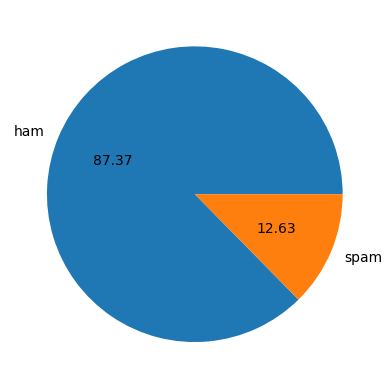

In [11]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [12]:
## Data in imbalanced

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/arujjval/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

counts_cols = ['num_characters', 'num_words', 'num_sentences']
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
##info about ham messages
df[df['target'] == 0][counts_cols].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [18]:
##info about spam messages
df[df['target'] == 1][counts_cols].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [19]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

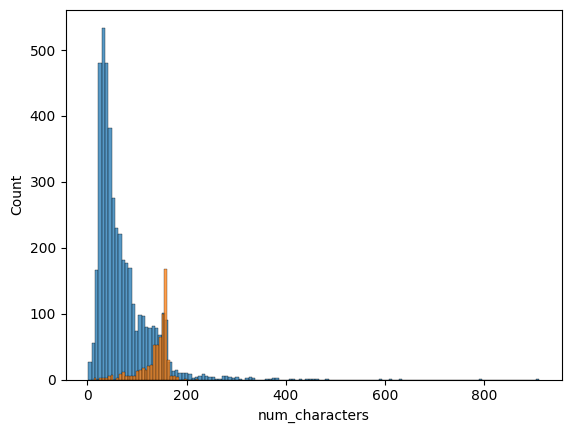

In [20]:
#for ham
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

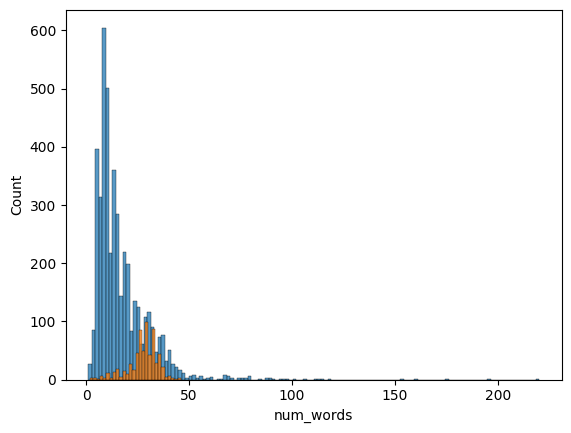

In [21]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'])

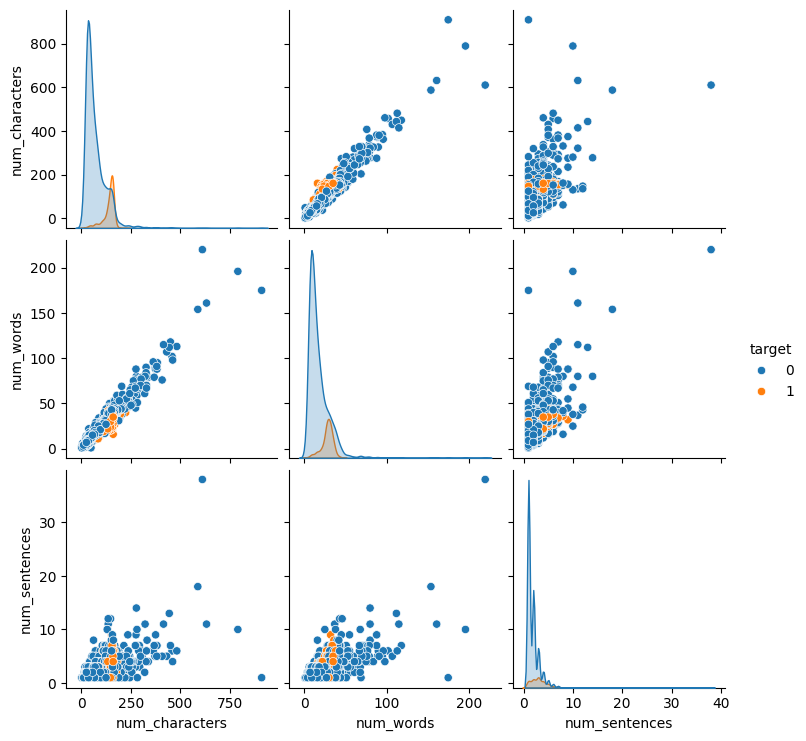

In [22]:
sns.pairplot(df, hue = 'target')

In [23]:

df[['target', *counts_cols]].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

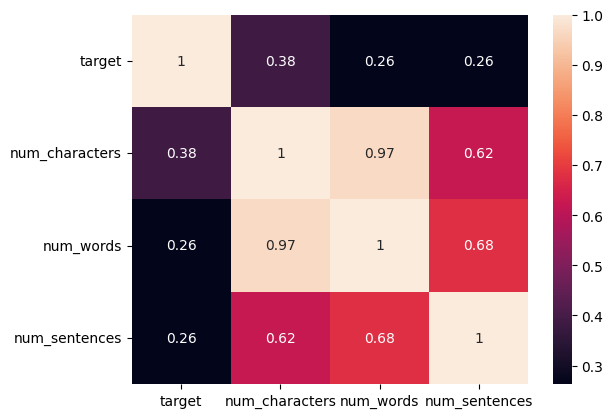

In [24]:
sns.heatmap(df[['target', *counts_cols]].corr(), annot=True)

## 3. Data Preprocessing

- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [25]:
import string 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/arujjval/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
def transform_text(text):
    text = text.lower() # convert to lower case
    text = nltk.word_tokenize(text) # tokenize into words
    ps = PorterStemmer()

    y = []
    for i in text: 
        if i.isalnum() and i not in string.punctuation and i not in stopwords.words():  # only alllowing alphanumeric words without stop words
            y.append(ps.stem(i)) # appending after stemming the word

    return ' '.join(y)    

In [27]:
df['transformed_text'] = df['text'].apply(lambda x: transform_text(x))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,jurong point crazi avail bugi great world buff...
1,0,Ok lar... Joking wif u oni...,29,8,2,lar joke wif
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win cup final tkt 21st ...
3,0,U dun say so early hor... U c already then say...,49,13,1,dun earli
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,usf live


In [29]:
# word cloud

from wordcloud import WordCloud
wc = WordCloud()

In [30]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = ' '))

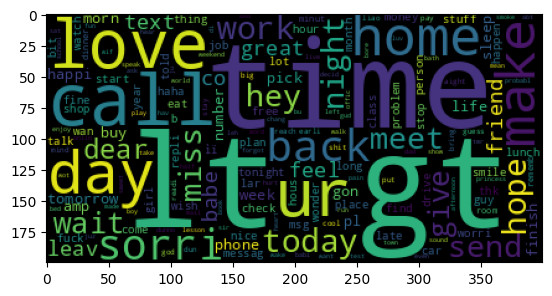

In [31]:
plt.imshow(spam_wc)

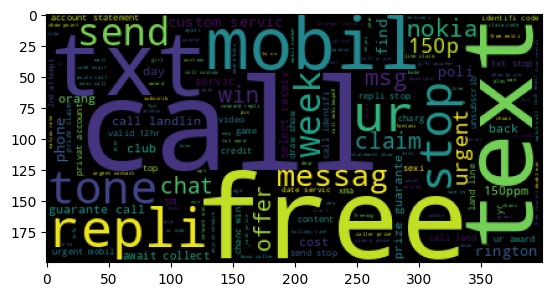

In [32]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = ' '))
plt.imshow(spam_wc)

## 4. Model Building

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)  # tfid

In [53]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target']

#X = np.hstack((X, df['num_characters'].values.reshape(-1, 1)))
X.shape

(5169, 3000)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state=0)

In [55]:
# from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [56]:
my_model = RandomForestClassifier()

In [57]:
my_model.fit(X_train, y_train)
predictions = my_model.predict(X_val)
print(accuracy_score(y_val, predictions))
print(confusion_matrix(y_val, predictions))
print(precision_score(y_val, predictions))

0.9758220502901354
[[885   0]
 [ 25 124]]
1.0


In [58]:
import pickle

pickle.dump(my_model, open('spam_model.pkl', 'wb'))
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(transform_text, open('transform_text.pkl', 'wb'))